# Part 1: Fundamentals

In its simplest form, 'Ocean Acidification' refers to the decrease in seawater pH driven by increasing atmospheric pCO<sub>2</sub>.

<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: {extensions: ["mhchem.js"]}
});
</script>
<script src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS_HTML"></script>

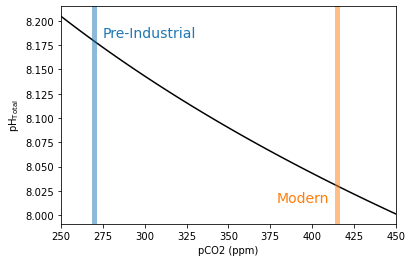

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cbsyst as cb
plt.rcParams['font.size'] = 14

sw = cb.Csys(pCO2=np.linspace(250, 450), TA=2300)

preind = 270
modern = 415

plt.plot(sw.pCO2, sw.pHtot, color='k')
plt.xlabel('pCO2 (ppm)')
plt.ylabel('$pH_{Total}$')
plt.xlim(250, 450)

plt.axvline(preind, color='C0', lw=5, alpha=0.5)
plt.text(preind + 5, 8.18, 'Pre-Industrial', color='C0', ha='left', va='bottom', fontsize=14)

plt.axvline(modern, color='C1', lw=5, alpha=0.5)
plt.text(modern - 5, 8.025, 'Modern', color='C1', ha='right', va='top', fontsize=14);


Before we start to think about Ocean Acidification, we must review the fundamentals of carbon in the ocean and the processes that affect it.
This material could fill an entire course, so we're going to skim over the essentials.
For a more complete account of these topics, I recommend Chapter 1 of {cite}`Zeebe2001` for the basics of ocean carbon chemistry, and Chapters 8-10 of {cite}`Sarmiento2006` for an account of biogeochemical processes.

## Carbon in Seawater

Carbon in seawater can be divided into 'Inorganic' and 'Organic' pools, each of which can exist in 'Dissolved' and 'Particulate' forms.

```{image} img/P1_01_CPools.png
:alt: Pools of carbon in seawater
:width: 40em
:align: center
```

### Dissolved Inorganic Carbon (DIC)

**DIC** is the simplest form of carbon in seawater - it is the sum of CO<sub>2</sub> and the products of CO<sub>2</sub> reacted with water.
This is the carbon pool that directly interacts with the atmosphere via the exchange of CO<sub>2</sub>, and is the main pool we are concerned with when considering ocean acidification.

````{margin}
```{note}
Square Brackets denote concentration.
```
````

The movement of CO<sub>2</sub> between ocean and atmosphere is predicted by Henry's Law, which describes the relationship between the partial pressure of a gas and its concentration in the liquid with the **solubility coefficient** K<sub>0</sub>:

$$
K_0 = \frac{[CO_2]_{aq}}{pCO_2}
$$

which depends on the temperature, and to a lesser extent salinity, of the water:

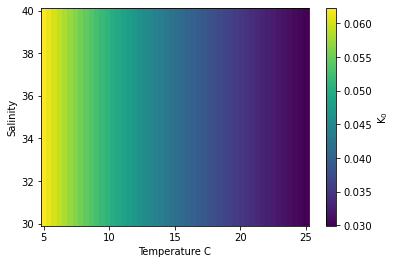

In [12]:
T = np.linspace(5, 25)
S = np.linspace(30, 40)

t, s = np.meshgrid(T, S)

# Ks = cb.calc_Ks(T=t, S=s)  # this will work once I've released the next CBsyst version...
# Ugly workaround until then...
sw = cb.Csys(pCO2=400, TA=2300, T_in=t.flatten(), S_in=t.flatten())
Ks = sw.Ks
Ks.K0 = Ks.K0.reshape(t.shape)

plt.pcolor(t, s, Ks.K0)
plt.colorbar(label='$K_0$')
plt.xlabel('Temperature C')
plt.ylabel('Salinity');

This means that more CO<sub>2</sub> is able to dissolve into cooler, less salty water.


Once CO<sub>2</sub> is dissolved it reacts with water to form carbonic acid, a diprotic acid that dissociates into three dissolved species:

$$
CO_{2(aq)} + H_2O \leftrightarrow \underbrace{H_2CO_3}_{carbonic~acid} \leftrightarrow \underbrace{HCO_3^-}_{bicarbonate} + H^+ \leftrightarrow \underbrace{CO_3^{2-}}_{carbonate} + 2H^+
$$

and DIC is defined as:

$$
\begin{align}
DIC &= [CO_{2(aq)}] + [H_2CO_3] + [HCO_3^-] + [CO_3^{2-}] \\
&= [CO_2^*] + [HCO_3^-] + [CO_3^{2-}]
\end{align}
$$

where $[CO_2^*]$ is used in place of the first two species because carbonic acid is functionally absent at normal seawater pH - as soon as CO<sub>2</sub> reacts with water to form carbonic acid it dissociates to bicarbonate and a proton.

:::{note}
:class: dropdown
This is a good approximation in most cases, but be aware that the reaction of CO<sub>2</sub> with water is much slower than the dissociation reactions because it involves breaking strong C-O bonds, whereas the dissociation simply adds and removes protons (H<sup>+</sup>).
This means that the CO<sub>2</sub><sup>*</sup> appriximation will start to break down in dynamic systems where DIC speciation is far from equilibrium with CO<sub>2(aq)</sub>.
This can become important when considering ocean-atmosphere interactions, because CO<sub>2(aq)</sub>, rather than than H<sub>2</sub>CO<sub>3</sub>, is the species that exchanges with CO<sub>2(g)</sub> in the atmosphere.
::: 

From the dissociation reaction above, you can see that the abundance of each DIC species will vary as a function of pH (where $pH = -log_{10}[H^+]$):

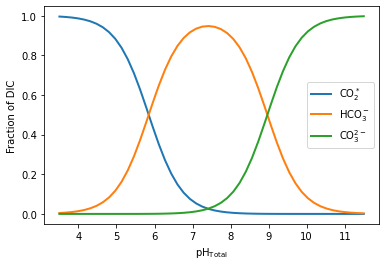

In [3]:
sw = cb.Csys(pHtot=np.linspace(3.5, 11.5), DIC=1)

plt.plot(sw.pHtot, sw.CO2, label='$CO_2^*$', lw=2)
plt.plot(sw.pHtot, sw.HCO3, label='$HCO_3^-$', lw=2)
plt.plot(sw.pHtot, sw.CO3, label='$CO_3^{2-}$', lw=2)

plt.legend()

plt.ylabel('Fraction of DIC')
plt.xlabel('$pH_{Total}$');

The speciation of DIC is described by the **stoichiometric equilibrium constants** K<sub>1</sub> and K<sub>2</sub>:

::::{margin}
:::{note}
The speciation of DIC has five unknowns (pCO<sub>2</sub>, pH, [CO<sub>2</sub><sup>*</sup>], [HCO<sub>3</sub><sup>-</sup>] and [CO<sub>3</sub><sup>2-</sup>]), and is described by the three equations for the speciation constants K<sub>0</sub>, K<sub>1</sub> and K<sub>2</sub>. This means that you need to know two of the unknowns to fully characterise DIC speciation.
:::
::::

$$
\begin{align}
K_1 &= \frac{[H^+][HCO_3^-]}{[CO_2^*]} \\
K_2 &= \frac{[H^+][CO_3^{2-}]}{[HCO_3^-]}
\end{align}
$$

which can be combined with the definition of DIC above to calculate the abundance of each DIC species as a function of [DIC], [H<sup>+</sup>] and the equilibrium constants K<sub>1</sub> and K<sub>2</sub>:

```{admonition} Click to show $[CO_2^*]$ example.
:class: dropdown

$
\begin{align}
DIC &= [CO_2^*] + [HCO_3^-] + [CO_3^{2-}] \\
&= [CO_2^*] + [HCO_3^-] + \frac{K_2 [HCO_3^-]}{[H^+]} & substitute ~ [CO_3^{2-}] ~ using ~ K_2 \\
&= [CO_2^*] + \frac{K_1[CO_2^*]}{[H^+]} + \frac{K_2 K_1 [CO_2^*]}{[H^+]^2} & substitute ~ [HCO_3^{-}] ~ using ~ K_1 \\
&= [CO_2^*] \left( 1 + \frac{K_1}{[H^+]} + \frac{K_2 K_1}{[H^+]^2} \right) & separate ~ [CO_2^*] \\
[CO_2^*] &= \frac{DIC}{1 + \frac{K_1}{[H^+]} + \frac{K_1K_2}{[H^+]^2}} & solve ~ for ~ [CO_2^*]
\end{align}
$
```

$$
\begin{align}
[CO_2^*] &= \frac{DIC}{1 + \frac{K_1}{[H^+]} + \frac{K_1K_2}{[H^+]^2}} \\
[HCO_3^-] &= \frac{DIC}{1 + \frac{[H^+]}{K_1} + \frac{K_2}{[H^+]^2}} \\
[CO_3^{2-}] &= \frac{DIC}{1 + \frac{[H^+]}{K_2} + \frac{[H^+]^2}{K_1K_2}} \\
\end{align}
$$

At standard salinity and temperature (35, 25 C) and 1 atmosphere pressure (surface seawater), these Ks and $pKs$ ($-log_{10}K$) are:

|       | $K$ | $pK$ |
|:------|-------|-------------|
| $K_0$ | $2.839 \times 10^{-2}$ | 1.547 |
| $K_1$ | $1.422 \times 10^{-6}$ | 5.847 |
| $K_2$ | $1.082 \times 10^{-9}$ | 8.966 |

### Speciation 'constants'
These 'constants' are not constant; they depend significantly on temperature, pressure and salinity. This is because the Ks themselves have no physical meaning - they are descriptive factors that capture the state of the underlying thermodynamics controlling the associatoin and dissociation of dissolved ions in solution. We use them because they allow us to conveniently calculate speciation.

The sensitivity of Ks to temperature and pressure arises directly from thermodynamics. 
Each of these properties modifies the free energy of the equilibrium reactions in the system, causing the balance of species to shift, and the speciation constants to change.

The effect of salinity is more complex.
All speciation constants in seawater (or other high-ionic-strength solutions) deviate significantly from thermodynamically calculated equilibrium constants for ideal (infinitely dilute) solutions.
This is because thermodynamic calculations deal with ion *activities*.
In an ideal solution activity is equivalent to concentration, but these quantities can vary substantially in complex ionic solutions.
This deviation is caused by ion-pairing interactions.
Seawater is full of dissociated charged species dissolved in a polar solvent (water), and these ions interact to form weakly bound pairs and clusters, as well as generating 'shells' of ordered water molecules around them.
It takes energy to break these interactions, so once an ion is involved in them it effectively lowers its availablility to take part in chemical reactions.
This is described by an *ion activity coefficient* ($\gamma$), which relates concentration to activity in a non-ieal solution:

$$
\{A\} = \gamma_A [A]
$$

Where curly brackets denote activity, and square brackets denote concentration.

These activity coefficients are complex to calculate - just think of the number of different ions in seawater that can interact, and then remember that each of these reactions will depend to different degrees on temperature and pressure!
Mathematical frameworks exist to make these calculations (e.g. the [Pitzer equations](https://en.wikipedia.org/wiki/Pitzer_equations) or [Debye–Hückel theory](https://en.wikipedia.org/wiki/Debye%E2%80%93H%C3%BCckel_theory)) and programs exist that will do them for you (e.g. [PHREEQC](https://www.usgs.gov/software/phreeqc-version-3)), but ultimately all of these involve approximations and empirical coefficients which can break down outside the strict boundary conditions that they were measured in.

For the purposes of seawater calculations, extensive empirical work has established precisely measured empirical speciation constants. These are distinguished from theoretical thermodynamic values by an asterisk (e.g. $K_1^*$), they work with ion concentrations instead of activities, and are known as **stoichiometric equilibrium constants**. These constants do a decent job of calculating carbon speciation over the entire range of temperature, pressure and salinity found in the modern ocean.


:::{figure-md} markdown-fig
<img src="https://github.com/oscarbranson/cbsyst/raw/master/cbsyst/test_data/GLODAP_data/Figures/pH_comparison.png" alt="The efficacy of empirical stoichiometric speciation constants." class="bg-primary mb-1" width="100%">

**Measured pH vs. pH predicted from DIC and TA measurements using stoichiometric equilibrium constants** for 79,896 seawater samples in the **GL**obal **O**cean **D**ata **A**nalysis **P**roject (GLODAP) database, which contains data from a wide range of temperature, pressure and salinity conditions.
:::


### Total Alkalinity(TA)

A final important concept in carbon speciation is the concept of **Total Alkalinity (TA)**.
This somewhat-tricky concept is a key property for describing ocean carbon because it is *conservative* (does not change with temperature or pressure, like mass, salt or DIC).
This is important because the concentration of the dissolved carbon species and pH all vary substantially with temperature and pressure.
This makes it difficult to understand whether the carbon system is being modified by external processes, or simply responding to changes in physical conditions.
A change in DIC or TA has to be caused by an external process acting on the water body.
Along with DIC, this provides two conservative quantities that can be used to fully describe the concentration and speciation of carbon in seawater.

So now we know why we might want it, what is it?!
Total Alkalinity can be described in different ways depending on the context.
For example, TA is:
1. the charge difference between conservative anions and cations
2. the excess of proton acceptors over donors
3. the moles of acid per kg of seawater that must be added to reach the 'equivalence point', where $[H^+] = [HCO_3^-]$

For our purposes you can think of TA as 'setting' both the pH and DIC speciation in seawater such that the positive and negative charges in that water balance.
For a more complete undertanding of the topic, I recommend Section 1.2 of {cite}`Zeebe2001`.

Regardless of the precise definition you use to get there, the important species that make up TA in seawater are:

$$
TA = [HCO_3^-] + 2 [CO_3^{2-}] + [B(OH)_4^-] + [OH^-] - [H^+]
$$

### TA vs. DIC plots

The conservative quantities DIC and TA provide a convenient framework for considering the influence of different physical and biogeochemical processes on carbon in the ocean.
The non-conservative quantities (pH, $pCO_2$ and the concentration of each C species) then plot as countours in DIC-TA space, where the position of these contours moves around as a function of temperature, salinity and pressure, corresponding to the underlying changes in Ks.

For example, within this framework we can consider the addition or removal of $CO_2$, which modifies DIC but not TA.
This shows us how adding or removing $CO_2$ shifts the balance between DIC and TA in seawater, causing the pH and carbon speciation to shift. 

Text(2016.6666666666667, 2352, '$CO_2~in$')

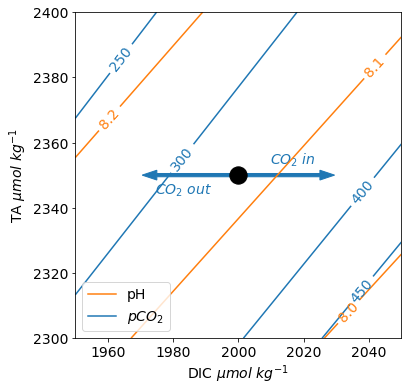

In [71]:
DIC = np.linspace(1950, 2050)
TA = np.linspace(2300, 2400)

dic, ta = np.meshgrid(DIC, TA)

sw = cb.Csys(DIC=dic, TA=ta)

fig, ax = plt.subplots(1,1,figsize=[6,6])
c_pH = ax.contour(sw.DIC, sw.TA, sw.pHtot, [8, 8.1, 8.2], colors='C1')
ax.clabel(c_pH)
ax.plot([],[],label='pH', color='C1')

c_pCO2 = ax.contour(sw.DIC, sw.TA, sw.pCO2, [250, 300, 400, 450], colors='C0')
ax.clabel(c_pCO2, )
ax.plot([],[],label='$pCO_2$', color='C0')

ax.set_xlabel('DIC $\mu mol~kg^{-1}$')
ax.set_ylabel('TA $\mu mol~kg^{-1}$')

ax.legend(loc='lower left')
ax.set_aspect(1)

delta = 25
centre = (2000, 2350)
ax.scatter(*centre, marker='o', s=300, color='k')

ax.arrow(*centre, -delta, 0, width=1, zorder=-1, color='C0')
ax.annotate('$CO_2~out$', xy=centre, xytext=(centre[0] - delta / 1.5, centre[1] - 2), ha='center', va='top', zorder=-1, color='C0')

ax.arrow(*centre, delta, 0, width=1, zorder=-1, color='C0')
ax.annotate('$CO_2~in$', xy=centre, xytext=(centre[0] + delta / 1.5, centre[1] +2), ha='center', va='bottom', zorder=-1, color='C0')

### Measuring Carbon in Seawater

As mentioned above, understanding carbon in seawater requires measurements of two aspects of the system. The most commonly measured components are DIC, TA and pH.

**pH** can be measured either using an $H^+$ electrode, calibrated against standard buffer solutions with known pH, or spectrophotometrically using indicator dyes. The latter method tends to be much more precise, but can only be conducted ex-situ, as it requires adding an indicator dye to the solution.

**TA** is measured by titration, adding a strong acid to a known volume of seawater and monitoring the pH of the reaction using an electrode. This produces a characteristic calibration curve with two inflection points that can be interpreted using a [Gran plot](https://en.wikipedia.org/wiki/Gran_plot) to determine the equivalence point of the reaction.

**DIC** is measured by acidifying the seawater to quantitatively convert DIC to CO<sub>2</sub>. This is then equilibrated with an overlying headspace where the CO<sub>2</sub> is measured by pressure change or spectral absorption methods.

### Approximating Carbon in Seawater

The complexity of carbon speciation in seawater can make it tricky to get an intuitive understanding of the influence of different oceangraphic and climatic processes.
There are some useful approximations we can make to simplify controlling parameters of the equilibrium, allowing us to get a feel for how the system responds to perturbations without having to do the full calculations.
These approximations arise from considering which carbon species contribute most to both DIC and TA at 'normal' seawater conditions: 

$$
\begin{align}
DIC &= \underbrace{[CO_2^*]}_{0.5\%} + \underbrace{[HCO_3^-]}_{86.5\%} + \underbrace{2 [CO_3^{2-}]}_{13\%} \\
TA &= \underbrace{[HCO_3^-]}_{77\%} + \underbrace{2 [CO_3^{2-}]}_{19\%} + \underbrace{[B(OH)_4^-]}_{4\%} + \underbrace{[OH^-] - [H^+]}_{minor}
\end{align}
$$

It's clear that $[HCO_3^-]$ and $[CO_3^{2-}]$ contribute most to both quantities.
This means we can approximate each in terms of only these species, with relatively little innacuracy.

$$
\begin{align}
DIC &\approx [HCO_3^-] + [CO_3^{2-}] \\
TA &\approx CA = [HCO_3^-] + 2 [CO_3^{2-}]
\end{align}
$$

We can then directly approximate species of interest from these approximations, following:


$$
\begin{align}
[CO_3^{2-}] &\approx CA - DIC \\
[HCO_3^-] &\approx DIC - [CO_3^{2-}] = 2DIC - CA \\
pCO_2 &\approx \frac{K_2 (2DIC - CA)^2}{K_0 K_1 (CA - DIC)}
\end{align}
$$

### Organic Carbon

**Total Organic Carbon (TOC)** is a second, major pool of carbon, consisting of a wide variety of complex carbon-based compounds produced by the action of biology.
Organic carbon is created from DIC by **photosynthesis**, and converted back to DIC by **respiration**, in a process broadly known as **remineralisation** - converting complex solids back to their dissolved constituent forms.
The Total Organic Carbon (**TOC**) pool is, rather arbitrarily, split into 'Particulate' (**POC**) and 'Dissolved' (**DOC**) pools, based on whether it will fit through a fine filter (typically 0.7 μm).

There are a lot of complexities surrounding organic carbon, but for our purposes we will approximate its formation and remineralisation to a single reversible chemical reaction converting between dissolved chemicals into complex organic molecules:

$$
106 CO_2 + 16 NO_3^- + HPO_4^{2-} + 78 H_2O + 18 H^+ \leftrightarrow C_{106}H_{175}O_{42}N_{16}P
$$

The ratio between the major nutrients in organic matter of 106C : 16N : P is relatively consistent across all marine organic matter. This phenomenon that was first observed in 1934 by the oceanographer Alfred Redfield, and has become known as the Redfield ratio.

In context of ocean carbon, we can see that the forward reaction consumes 106 units of $CO_2$ and releases 18 $H^+$. The release of $H^+$ is caused by the dissociation of $HNO_3$ and $H_3PO_4$ during uptake. In DIC-TA space, this places the vectors for organic carbon production and remineralisation on a slight angle relative to $CO_2$ uptake/release:

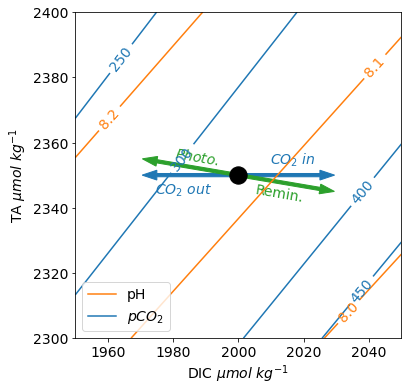

In [72]:
delta = np.array([1, -18./106]) * 25

ax.arrow(*centre, *-delta, width=1, zorder=-1, color='C2')
ax.annotate('$Photo.$', xy=centre, xytext=centre - delta / 2, ha='center', va='bottom', zorder=-1, rotation=-9.8, color='C2')

ax.arrow(*centre, *delta, width=1, zorder=-1, color='C2')
ax.annotate('Remin.', xy=centre, xytext=centre + delta / 2, ha='center', va='top', zorder=-1, rotation=-9.8, color='C2')

fig


### Particulate Inorganic Carbon (PIC)
PIC is CaCO<sub>3</sub>. This can be any of the CaCO<sub>3</sub> polymorphs which are, in approximate order of solubility, calcite, aragonite, high-Mg calcite, vaterite, monohydrocalcite and amorphous calcium carbonate. PIC is produced from DIC by **calcification**, predominantly mediated by biology, and return to DIC by **dissolution**, which is (mostly) an inorganic process.

These processes are covered in more detail in Part 2, but briefly...

Calcification and dissolution can be written as the reversible reaction:
$$
Ca^{2+} + CO_3^{2-} \leftrightarrow CaCO_3
$$

We can see from this that calcification consumes one unit of DIC and **two** units of alkalinity, because of the double charge on CO<sub>3</sub><sup>2-</sup>. This makes these processes plot with a 2:1 ratio in TA:DIC space:


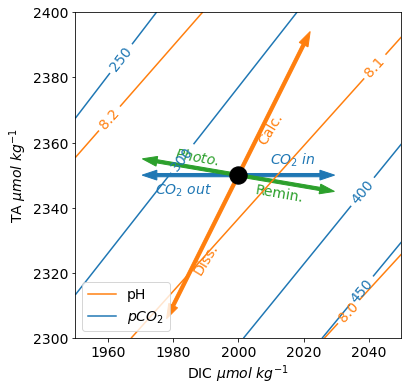

In [73]:
delta = np.array([1, 2]) * 20

ax.arrow(*centre, *-delta, width=1, zorder=-1, color='C1')
ax.annotate('Diss.', xy=centre, xytext=centre - delta / 2, ha='center', va='top', zorder=-1, rotation=58.7, color='C1')

ax.arrow(*centre, *delta, width=1, zorder=-1, color='C1')
ax.annotate('Calc.', xy=centre, xytext=centre + delta / 2, ha='center', va='top', zorder=-1, rotation=58.7, color='C1')

fig

Another point noting here is that, just like with the reversible reactions of DIC dissociation, calcfication and dissolution are described using an equilibrium constant, K. However, because we're dealing with a mineral rather than a dissolved species it's known as an *equilibrium solubility product*, and is defined as the product of the constituent ions in seawater when the mineral will neither form nor dissolve:

$$
\begin{align}
K_{sp} = ([Ca^{2+}][CO_3^{2-}])_{eq}
\end{align}
$$

Because the different minerals have different characteristic structures, they have different enthalpy, Gibb's free energies and therefore stabilities. This means that each polymorph of a mineral has a different K<sub>sp</sub>, for example at standard salinity, temperature and pressure:

|       | $K$ | $pK$ |
|:------|-------|-------------|
| $K_{sp,Calc}$ | $4.272 \times 10^{-7}$ | 6.369 |
| $K_{sp,Arag}$ | $6.482 \times 10^{-7}$ | 6.188 |

### Saturation State

These Ks allow us to calculate a very useful quantity that is commonplace in discussion of ocean acidification - the saturation state, $\Omega$, of water, which is defined as:

$$
\begin{align}
\Omega = \frac{[Ca^{2+}][CO_3^{2-}]}{K_{sp}}
\end{align}
$$

When $\Omega = 1$ calcium carbonate is in equilibrium with the solution (neither forms nor dissolves), calcium carbonate formation is favoured when $\Omega > 1$, and dissolution is favoured at $\Omega < 1$.

From this, we can see that $\Omega$ is sensitive to changes in [Ca<sup>2+</sup>], [CO<sub>3</sub><sup>2-</sup>] or K<sub>sp</sub>.
Of these, [Ca<sup>2+</sup>] is relatively constant in seawater (10.2 mmol kg<sup>-1</sup>), [CO<sub>3</sub><sup>2-</sup>] is highly variable and depends to the state of the DIC equilibrium (and therefore ocean pH/pCO<sub>2</sub>/ocean acidification), and K<sub>sp</sub>, just like the equilibrium constants for DIC speciation, is sensitive to temperature, salinity and pressure:

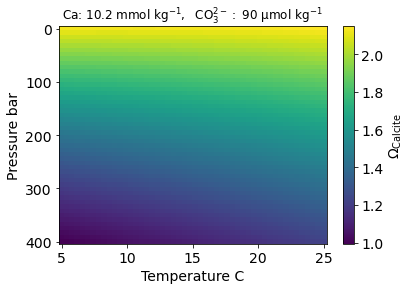

In [59]:
T = np.linspace(5, 25)
P = np.linspace(0, 400)

t, p = np.meshgrid(T, P)

Ks = cb.calc_Ks(T=t, S=35, P=p)
Ca = 10.2e-3  # mol kg-1
CO3 = 90e-6  # mol kg-1
Omega = Ca * CO3 / Ks.KspC

plt.pcolor(t, p, Omega)
plt.gca().invert_yaxis()
plt.colorbar(label='$\Omega_{Calcite}$')
plt.title('Ca: 10.2 $mmol~kg^{-1},~~CO_3^{2-}:~90~\mu mol~kg^{-1}$', fontsize=12)
plt.xlabel('Temperature C')
plt.ylabel('Pressure bar');

This means that, for a given [Ca<sup>2+</sup>] and [CO<sub>3</sub><sup>2-</sup>], calcium carbonate minerals dissolve more easily at higher pressures and lower temperatures.

However, this picture isn't quite right, because those same temperature and pressure changes will also drive concommitant changes K<sub>1</sub> and K<sub>2</sub>, and therefore [CO<sub>3</sub><sup>2-</sup>]. This changes two parts of our $\Omega$ expression, and the true change in calcium carbonate solubility is:

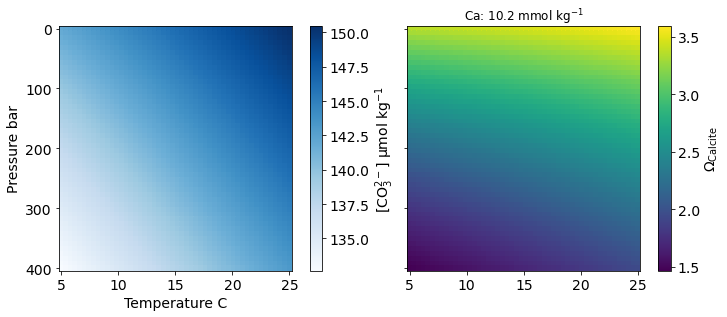

In [60]:
T = np.linspace(5, 25)
P = np.linspace(0, 400)

t, p = np.meshgrid(T, P)

sw = cb.Csys(TA=2300, DIC=2100, T_in=t.ravel(), S_in=35, P_in=p.ravel())
Ca = 10.2e-3  # mol kg-1
Omega = Ca * sw.CO3 * 1e-6 / sw.Ks.KspC

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4.3], sharey=True, constrained_layout=True)

ma1 = ax1.pcolor(t, p, sw.CO3.reshape(t.shape), cmap=plt.cm.Blues)
fig.colorbar(ma1, ax=ax1, label='$[CO_3^{2-}]~\mu mol~kg^{-1}$')
ax1.set_xlabel('Temperature C')
ax1.set_ylabel('Pressure bar');

ma2 = ax2.pcolor(t, p, Omega.reshape(t.shape))
ax2.invert_yaxis()
fig.colorbar(ma2, ax=ax2, label='$\Omega_{Calcite}$')
ax2.set_title('Ca: 10.2 $mmol~kg^{-1}$', fontsize=12)
ax1.set_xlabel('Temperature C');

As you can see here, the change in $\Omega$ with pressure is similar, but the influence of temperature is increased. This has the major implication that the cold surface ocean in the high lattitudes will be affected by ocean acidification first.

### Tools for calculating Ocean Carbon Chemistry

A number of these exist for your favourite flavour of numerical tool. The main ones are:
- **Excel**: [CO2SYS](https://cdiac.ess-dive.lbl.gov/ftp/co2sys/CO2SYS_calc_XLS_v2.1/)
- **Matlab**: [CO2SYS.m](https://au.mathworks.com/matlabcentral/fileexchange/78378-co2sysv3-for-matlab)
- **Python**: [cbsyst](https://github.com/oscarbranson/cbsyst) (with a focus on modfied seawater chemistry and B isotopes for palaeo applications), or [PyCO2SYS](https://pyco2sys.readthedocs.io/en/latest/) which is a direct port of CO2SYS.m
- **R**: [seacarb](https://www.rdocumentation.org/packages/seacarb)

### References
```{bibliography}
```